# Cleaning the Spitzer spectra

8 March 2021, Ben de Vries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Here we collect all the file names in the data directory.

In [3]:
directory = "data/raw/TTau/IRS-Christian/"
files = os.listdir(directory)
len(files)

26

## Rebin the data to one wavelength grid

Some of the data has different resolutions and ranges so I bin them to one wavelength range. The resolution is about 0.25micron, which still makes us able to see crystalline dust resonances (which have a width of ~1-2 micron).

In [4]:
bins = np.linspace(5.,35., num=121)#[0, 5,10,15,20,25,30,35,40]
new_wavelength = []
for i in range(len(bins)):
    if i < len(bins)-1: 
        new_wavelength.append(bins[i]+(bins[i+1]-bins[i])/2)
bins

array([ 5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,
        7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,
        9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 ,
       11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75,
       14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  ,
       16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25,
       18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  , 20.25, 20.5 ,
       20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25, 22.5 , 22.75,
       23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 , 24.75, 25.  ,
       25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75, 27.  , 27.25,
       27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  , 29.25, 29.5 ,
       29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25, 31.5 , 31.75,
       32.  , 32.25, 32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75, 34.  ,
       34.25, 34.5 , 34.75, 35.  ])

I read in and rebin all the files. The original spectra are stored in a dict ```specs``` and the rebinned ones are stored in a dataframe ```specs_binned```.

In [5]:
specs, specs_binned, specs_norm = {}, pd.DataFrame(), pd.DataFrame()
for f in files:
    obj_name = f.split('.csv')[0] # Get the object name from the file name
    s = pd.read_csv(os.path.join(directory, f)) # Read in the csv file for the object
    specs.update({'w_'+obj_name: s["wavelength"]}) # add the wavelength and flux to the dict
    specs.update({'f_'+obj_name: s["flux"]})
    s['wavelength_bins'] = pd.cut(s['wavelength'], bins) # Cut the wavelength into bins
    s_bin = s.groupby(['wavelength_bins'])['flux'].mean().reset_index() # Group by bin and average in the bin
    specs_binned[obj_name] = s_bin['flux'] # Put the binned fluxes into specs_binned
    specs_norm[obj_name] = (s_bin['flux']-s_bin['flux'].mean())/s_bin['flux'].std() # Reduce the feature(flux) 
                                                                                    # levels for easier use in ML


## Lets have a look at one of the spectra

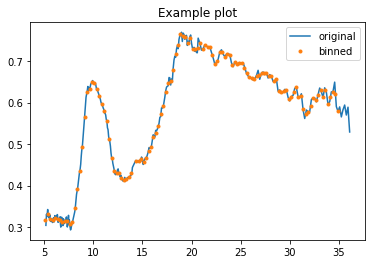

True

In [9]:
plotfile='BP-Tau'
plt.plot(specs['w_'+plotfile], specs['f_'+plotfile], label='original')
plt.plot(new_wavelength, specs_binned[plotfile], ".", label='binned')
plt.title("Example plot")
plt.legend()
plt.show()
plt.close()
np.isnan(specs_binned[plotfile]).any()

And lets see the average spectrum

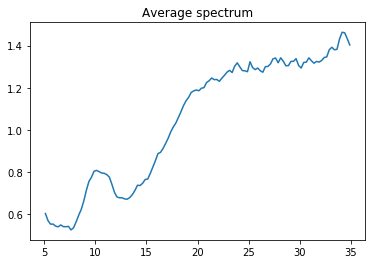

In [11]:
plt.plot(new_wavelength, specs_binned.mean(axis=1))
plt.title('Average spectrum')
plt.show()

Now to save the data

In [9]:
output_directory = "data/binned/TTau/IRS-Christian/"

In [28]:
pd.DataFrame(new_wavelength).to_csv(os.path.join(output_directory, "TTau_spectra_binned_wavelength.csv"), index=False)
specs_binned.to_csv(os.path.join(output_directory, "TTau_spectra_binned_fluxes.csv"), index=False)

And a check

In [30]:
pd.read_csv(os.path.join(output_directory, "TTau_spectra_binned_fluxes.csv")).head()

,CX-Tau,SZ50,DF-Tau,DG-Tau,BP-Tau,DR-Tau,GW-Lup,FT-Tau,V1094Sco,DN-Tau,...,WX-Cha,LkCa15,SY-Cha,WA-Oph6,HK-Tau-B,RW-Aur,XX-Cha,SZ98,VW-Cha,wavelength
0,0.094564,0.135032,1.286557,1.864737,0.316833,2.050333,NaN,0.162737,0.135167,0.239397,...,0.511260,0.155042,0.173041,0.915681,0.194190,1.008920,0.138236,0.353582,0.926323,5.125
1,0.099114,0.146360,1.144572,1.989051,0.330404,1.914572,NaN,0.171933,0.130256,0.228572,...,0.442444,0.153514,0.165710,0.889866,0.190915,0.992892,0.131882,0.337941,0.878628,5.375
2,0.098763,0.144867,1.054155,2.011706,0.319811,1.881706,NaN,0.163080,0.122607,0.226957,...,0.424629,0.143247,0.159675,0.873766,0.180816,0.949140,0.127940,0.338554,0.834307,5.625
3,0.098917,0.147476,1.075395,2.110258,0.317471,1.892422,NaN,0.156957,0.123200,0.222620,...,0.422534,0.140699,0.161724,0.861376,0.172734,0.928021,0.126169,0.344466,0.809528,5.875
4,0.100230,0.150169,1.037847,2.122913,0.321052,1.842032,NaN,0.154219,0.118323,0.223233,...,0.406240,0.132310,0.158932,0.848555,0.170350,0.912182,0.123827,0.349215,0.776016,6.125


In [31]:
pd.read_csv(os.path.join(output_directory, "TTau_spectra_binned_wavelength.csv")).head()

,0
0,5.125
1,5.375
2,5.625
3,5.875
4,6.125
